<a href="https://colab.research.google.com/github/Rysekk/MNIST-100labels/blob/main/Deep_Learning_projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
#Import de la base de donnée MNIST

(train_X, train_y), (test_X, test_y) = mnist.load_data()

print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [2]:
import numpy as np

#creation des matrices pour stocker les 100 labels
train_X100label = np.zeros(shape=(100,28,28)).astype('uint8')
train_y100label = np.zeros(shape=(100)).astype('uint8')

#On selectionne dans X_train et Y_train les 100 labels 
counter = 0
for i in range(10):
    train_filter = np.where(train_y == [i])
    for j in range(10):
        X_train, Y_train = train_X[train_filter], train_y[train_filter]
        
        train_X100label[counter] = X_train[counter]
        train_y100label[counter] = Y_train[counter]
        counter+=1

label num 0:  0


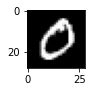

label num 1:  1


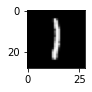

label num 2:  2


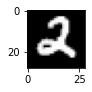

label num 3:  3


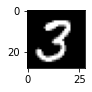

label num 4:  4


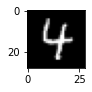

label num 5:  5


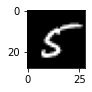

label num 6:  6


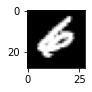

label num 7:  7


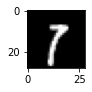

label num 8:  8


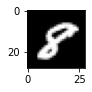

label num 9:  9


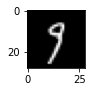

In [3]:
#plot chaque dizaine des 100 labels selectionés
from matplotlib import pyplot
for i in range(10):
    pyplot.subplot(2,5,1+i)
    pyplot.imshow(train_X100label[i*10], cmap=pyplot.get_cmap('gray'))
    print("label num "+str(i)+": ",train_y100label[i*10])
    pyplot.show()

In [4]:
#suppression des veleur qui ne servent plus
del X_train,Y_train,train_X,train_y,train_filter,i,j,counter

In [5]:
#Il ne reste plus qu'à les melanger pour avoir un truc non-uniforme et sans biais
# Using zip() + * operator + shuffle()
import random
temp = list(zip(train_y100label, train_X100label))
random.shuffle(temp)
train_y100label, train_X100label = zip(*temp)

y_train = np.array(train_y100label).astype('uint8')
x_train = np.array(train_X100label).astype('uint8')

### Data Processing

In [6]:
#pour le test
import tensorflow as tf
#on ajoute un canneau 
x_test = test_X.reshape((10000,28,28,1))
#pour le rgb (donc = 3)
x_test = x_test.repeat(3,-1)
#on normalise
x_test = x_test.astype('float32')/255
#on reshape l'image pour quelle corresponde a l'input du resnet50 qui doit etre du 32 x 32 
x_test = tf.image.resize(x_test,[32,32])
#on convertie le train en tensor
x_test = tf.convert_to_tensor(x_test)

In [7]:
#pour le train
x_train = x_train.reshape((100,28,28,1))
x_train = x_train.repeat(3,-1)
x_train = x_train.astype('float32')/255
x_train = tf.image.resize(x_train,[32,32])
x_train = tf.convert_to_tensor(x_train)

In [8]:
#pour les y on les transformes en one hot encoder
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(test_y)
y_train = to_categorical(y_train)

In [9]:
#implementation resnet50
from keras.layers import  Input, Dense, Flatten
from keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
import numpy as np

#importation du resnet 
inp = tf.keras.Input(shape=(32,32,3))
resnet = ResNet50(include_top=False,  pooling='none', input_tensor= inp,  weights='imagenet')

#on ajoute un Dense layer et on l'ajoute comme output pour la classification 
X = Flatten()(resnet.output)
prediction = Dense(10, activation='softmax',name='class_layer')(X)

model = Model(inputs = resnet.input, outputs = prediction)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
historique = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,verbose=1)

Epoch 1/20
4/4 [==============================] - 13s 2s/step - loss: 3.1805 - accuracy: 0.1300 - val_loss: 5.7014 - val_accuracy: 0.0980
Epoch 2/20
4/4 [==============================] - 5s 2s/step - loss: 1.1131 - accuracy: 0.6500 - val_loss: 7.2590 - val_accuracy: 0.0974
Epoch 3/20
4/4 [==============================] - 5s 2s/step - loss: 0.9954 - accuracy: 0.6700 - val_loss: 12.0097 - val_accuracy: 0.0976
Epoch 4/20
4/4 [==============================] - 5s 2s/step - loss: 0.6839 - accuracy: 0.8100 - val_loss: 13.1825 - val_accuracy: 0.0983
Epoch 5/20
4/4 [==============================] - 5s 2s/step - loss: 1.1849 - accuracy: 0.7500 - val_loss: 11.9418 - val_accuracy: 0.0980
Epoch 6/20
4/4 [==============================] - 5s 2s/step - loss: 0.8541 - accuracy: 0.7600 - val_loss: 10.3637 - val_accuracy: 0.1010
Epoch 7/20
4/4 [==============================] - 5s 2s/step - loss: 0.8629 - accuracy: 0.7900 - val_loss: 20.6482 - val_accuracy: 0.0980
Epoch 8/20
4/4 [===================